In [1]:
import numpy as np
from src.models import ols_normal_eq, ols_gd
from src.evaluation import mse, r2_score
import matplotlib.pyplot as plt 

# Closed form OLS vs Gradient decent

In [4]:
n, d = 100, 30
X = np.random.randn(n, d)
y = np.random.randn(100)

In [12]:
beta, y_hat, residuals = ols_normal_eq(X, y, add_intercept=False, l2=0.001)
beta_gd, losses, grad_norm_history = ols_gd(X, y, lr=1e-2, standardize=False)

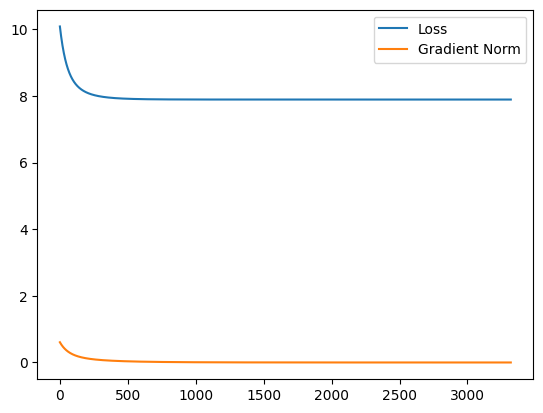

First five coordinates of solution via closed form and gradient decent
[0.0438516  0.21050305 0.13376537 0.12880128 0.2321934 ]
[0.04385491 0.21049859 0.13376833 0.12879414 0.23219035]


In [13]:
plt.plot(losses, label="Loss")
plt.plot(grad_norm_history, label="Gradient Norm")
plt.legend()
plt.show()
print("First five coordinates of solution via closed form and gradient decent")
print(beta[:5])
print(beta_gd[:5])

In [9]:
print("First five coordinates of y and y^:")
print(y[:5])
print(y_hat[:5])

First five coordinates of y and y^:
[-0.47249754  0.49842097  1.02162922  1.19178737 -1.32815844]
[-0.19171103  0.44555043  0.51548374 -0.55271728 -0.94098215]


In [14]:
print("Closed form OLS evaluation:")
print(f"MSE: {mse(y, y_hat)}")
print(f"R2: {r2_score(y, y_hat)}")

print("Gradient Descent OLS evaluation:")
y_hat_gd = X @ beta_gd
print(f"MSE: {mse(y, y_hat_gd)}")
print(f"R2: {r2_score(y, y_hat_gd)}")

Closed form OLS evaluation:
MSE: 0.6231191738190577
R2: 0.38536184578196553
Gradient Descent OLS evaluation:
MSE: 0.623119174060447
R2: 0.38536184554386166


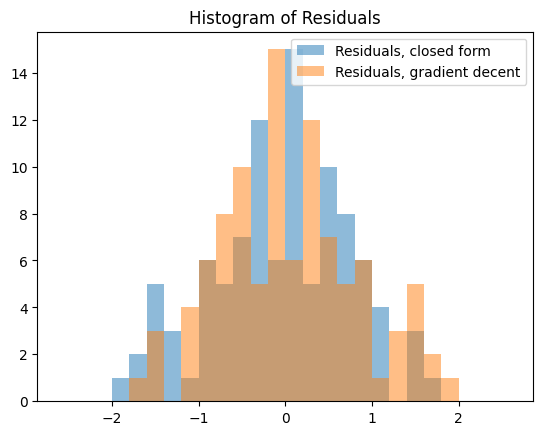

In [20]:
plt.hist(residuals, bins=list(np.linspace(-2.6, 2.6, 27)), label="Residuals, closed form", alpha=0.5)
plt.hist(y_hat_gd - y, bins=list(np.linspace(-2.6, 2.6, 27)), label="Residuals, gradient decent", alpha=0.5)
plt.title("Histogram of Residuals")
plt.legend()
plt.show()